# Project Report

Anirudh Narwal — Student No. : 28728897

## Introduction

Cardiovascular health is integral to one's overall well-being, with the maximum heart rate (MHR) being an important indicator of the heart's fitness. MHR usually decreases with age and reflects the heart's efficiency during physical exertion. Various clinical factors like resting blood pressure, serum cholesterol levels, and exercise-induced angina influence MHR. Elevated cholesterol and blood pressure can strain the heart, reducing MHR, while regular physical activity can improve it. One's lifestyle, habits and clinical health all contribute to cardiovascular function.

<img src='https://i.giphy.com/media/v1.Y2lkPTc5MGI3NjExbGFuMWhhNmJobWVodzF1enU4eXI2YTJxbGYxc2o1cnV3M2x2bWhqNiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/c76IJLufpNwSULPk77/giphy.gif' width='400'>

Source: https://giphy.com/gifs/LINEFRIENDS-brown-line-friends-minini-c76IJLufpNwSULPk77

For the purposes of my DSCI100 Project, I shall be working with a modified version of the cardiovascular data collect by the University of California, Irvine as a part of their [Heart Disease Database](https://archive.ics.uci.edu/dataset/45/heart+disease). The database contains extensive medical information and fourteen relevant attributes including `age`, `cholestoral`, `resting blood pressure` etc. from four locations. The locations are -

- Cleveland, Ohio, USA
- Hungary
- Swiss Confederation
- VA Long Beach, California, USA

The question I wish to answer using this database is **if we can predict the maximum heart rate achieved (`thalach`) by a patient during exercise based on their age, resting blood pressure, and other clinical features?**

## Methods & Results

We shall first attempt to load, read, clean and tidy the databases. Subsequently, to train a model, I shall split the dataset into the training and testing datasets. What follows is the process of recognizing the most influential predictors; once recognised, they can be used to create a regression model. Lastly, the accuracy of it is tested, and the analysis is done. 

In [1]:
# Load necessary libraries
library(tidyverse)
library(repr)
library(tidymodels)
library(dplyr)
library(GGally)
library(ISLR)
library(tibble)
library(ggplot2)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

In [2]:
# Define column names
columns <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
categorical_columns <- c("sex", "cp", "fbs", "restecg", "exang", "slope", "thal")

# Function to read and process data
read_and_process <- function(file_path, col_names, location) {
  data <- read_csv(file = file_path, col_names = col_names) |>
  mutate(
    sex = as_factor(sex),
    cp = as_factor(cp),
    fbs = as_factor(fbs),
    restecg = as_factor(restecg),
    exang = as_factor(exang),
    slope = as_factor(slope),
    thal = as_factor(thal),
    trestbps = as.numeric(trestbps),
    chol = as.numeric(chol),
    thalach = as.numeric(thalach),
    oldpeak = as.numeric(oldpeak),
    ca = as.numeric(ca),
    location = as_factor(location)  # Adding location as a constant column for each dataset
  )
  return(data)
}

# Read and process each dataset
cleveland_data <- read_and_process("https://raw.githubusercontent.com/Anirudhnarwal03/DSCI100_2023S1_AN28728897/main/data/heart_disease/processed.cleveland.data", columns, "Cleveland")
hungarian_data <- read_and_process("https://raw.githubusercontent.com/Anirudhnarwal03/DSCI100_2023S1_AN28728897/main/data/heart_disease/processed.hungarian.data", columns, "Hungarian")
swiss_data <- read_and_process("https://raw.githubusercontent.com/Anirudhnarwal03/DSCI100_2023S1_AN28728897/main/data/heart_disease/processed.switzerland.data", columns, "Swiss")
va_data <- read_and_process("https://raw.githubusercontent.com/Anirudhnarwal03/DSCI100_2023S1_AN28728897/main/data/heart_disease/processed.va.data", columns, "VA")

# Combine all datasets into one
total_data <- bind_rows(cleveland_data, hungarian_data, swiss_data, va_data)

# Display the combined data
head(total_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion”
Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): trestbps, chol, fbs, restecg, thalach, exang, slope, ca, thal
dbl (5): age, sex, cp, oldpeak, num

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = as.

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6.0,0,Cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3,3.0,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2,7.0,1,Cleveland
37,1,3,130,250,0,0,187,0,3.5,3,0,3.0,0,Cleveland
41,0,2,130,204,0,2,172,0,1.4,1,0,3.0,0,Cleveland
56,1,2,120,236,0,0,178,0,0.8,1,0,3.0,0,Cleveland


The variables are explained as follows -

### Table 1 : Description of the Variables Contained in the Dataset

| Variable Name | Description                                              | Type        |
|---------------|----------------------------------------------------------|-------------|
| `age`         | Age in years                                             | Numerical   |
| `sex`         | Sex (1 = male; 0 = female)                               | Categorical |
| `cp`          | Chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic) | Categorical |
| `trestbps`    | Resting blood pressure (in mm Hg on admission to the hospital) | Numerical   |
| `chol`        | Serum cholesterol in mg/dl                               | Numerical   |
| `fbs`         | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)    | Categorical |
| `restecg`     | Resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality, 2: showing probable or definite left ventricular hypertrophy) | Categorical |
| `thalach`     | Maximum heart rate achieved                              | Numerical   |
| `exang`       | Exercise induced angina (1 = yes; 0 = no)                | Categorical |
| `oldpeak`     | ST depression induced by exercise relative to rest       | Numerical   |
| `slope`       | The slope of the peak exercise ST segment (1: upsloping, 2: flat, 3: downsloping) | Categorical |
| `ca`          | Number of major vessels (0-3) colored by fluoroscopy     | Numerical   |
| `thal`        | Thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect) | Categorical |
| `num`         | Diagnosis of heart disease (0: < 50% diameter narrowing, 1: > 50% diameter narrowing) | Numerical |
| `location`         | Geographical location of the observation | Categorical |

The variables according to medical science that would be the most useful to my analysis (predicting `thalach`, the maximum heart rate achieved) would be `age`, resting blood pressure (`trestbps`), and ST depression induced by exercise (`oldpeak`). Let's select for, summarise and visualise them to identify the best predictors.

In [3]:
data <- total_data |>
        select(age, trestbps, thalach, oldpeak, location)

head(data)

age,trestbps,thalach,oldpeak,location
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,150,2.3,Cleveland
67,160,108,1.5,Cleveland
67,120,129,2.6,Cleveland
37,130,187,3.5,Cleveland
41,130,172,1.4,Cleveland
56,120,178,0.8,Cleveland


We now split our data into its training and testing sets, and using the training set, summarise the data and produce some visualisations. While splitting, we shall also filter out values that are NA.

In [4]:
# Splitting the data for creating a model
data_split <- initial_split(data, prop = 3/4, strata = thalach)
data_training <- data_split |>
        training() |>
        drop_na()
data_testing <- data_split |>
        testing() |>
        drop_na()

# Displaying the number of observations
nrow(data_training)

numerical_columns <- c("age", "trestbps", "thalach", "oldpeak")

# Summarising the mean of the numerical variables
summarise_at(data_training, numerical_columns,mean, na.rm = TRUE)

[1] 636

age,trestbps,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>
52.68082,132.0723,137.7767,0.8507862


We shall now attempt to visualise the variables here to see what relationship exists between `thalach` and the other variables. This is done to determine what type of regression model would be the best for our scenario.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


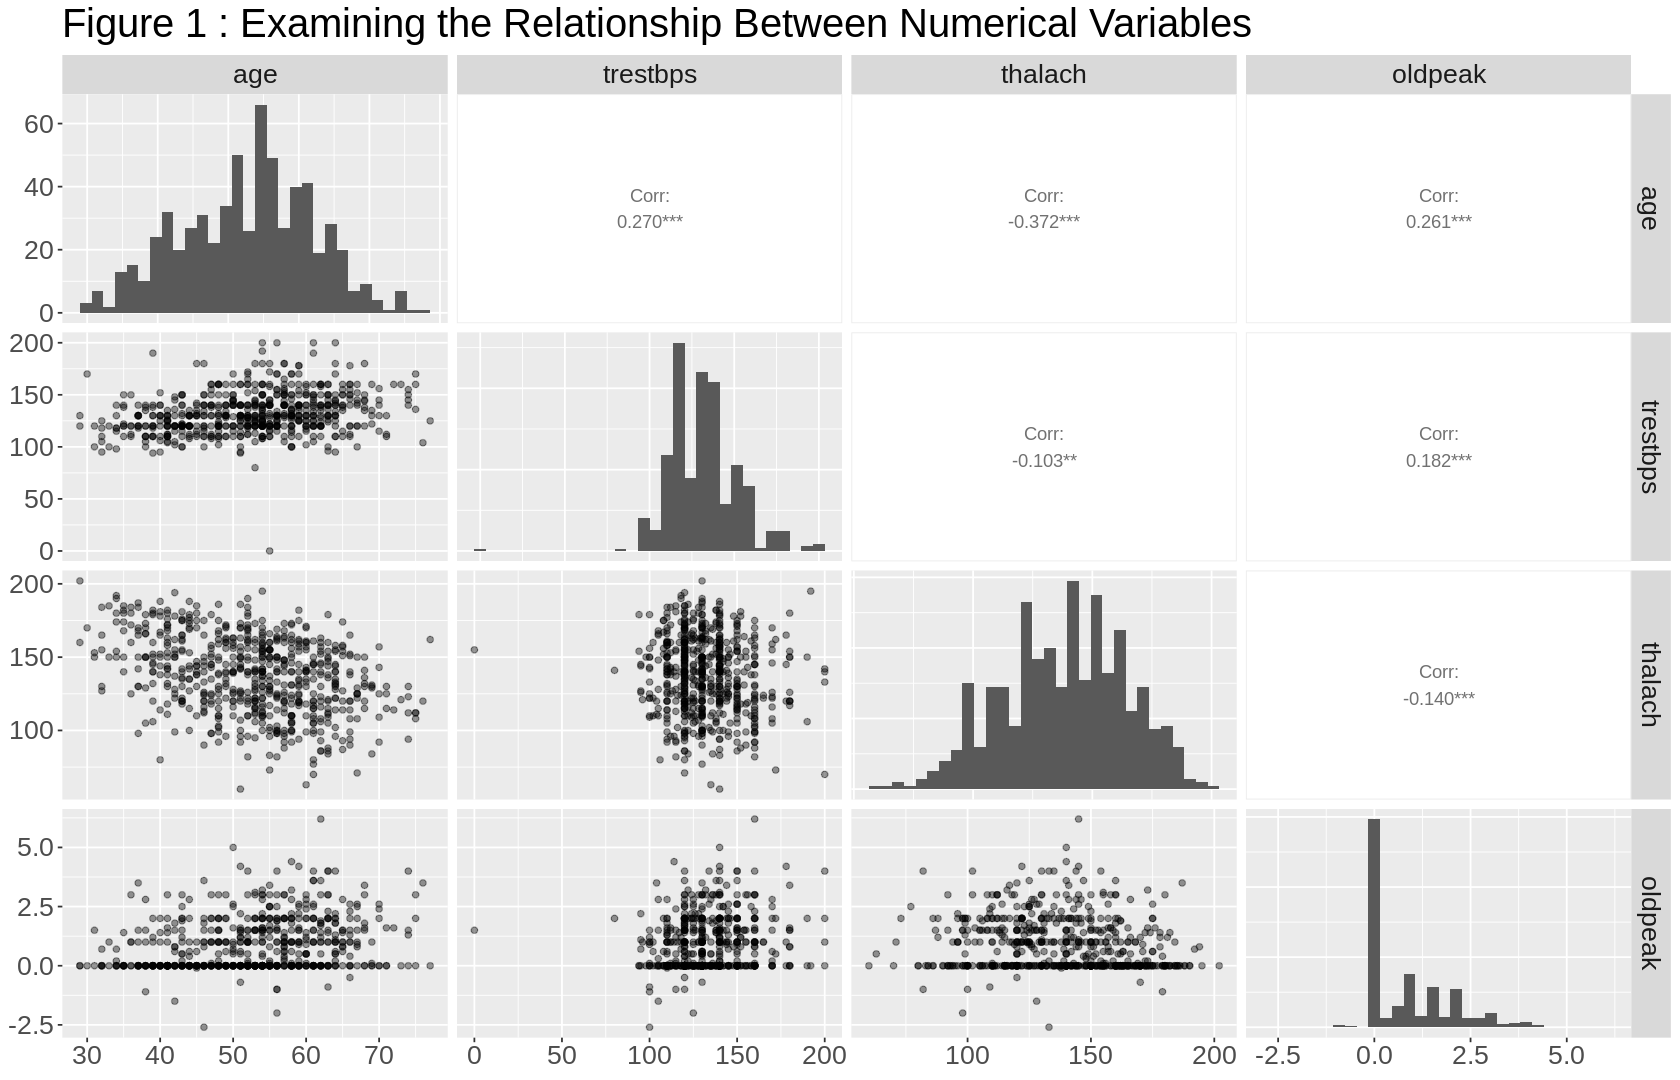

In [5]:
# Set the size of the plot
options(repr.plot.width = 14, repr.plot.height = 9)

# Select relevant columns and create a pair plot
data_pairplot <- select(data_training, age, trestbps, thalach, oldpeak) |>
    ggpairs(  # Create pair plot using GGally package
        lower = list(continuous = wrap('points', alpha = 0.4)),  # Scatter plots in lower triangle
        diag = list(continuous = "barDiag")  # Bar plots in diagonal
    ) +
    theme(text = element_text(size = 20)) +  # Set theme with larger text
    ggtitle("Figure 1 : Examining the Relationship Between Numerical Variables")  # Add title to the plot

# Display the plot
data_pairplot

As we visualise the variables and their relationship to one another, we largely see that a non-linear relationship emerges between `thalach` and the other variables. As such it would be in our best interest to pursue a k-nn regression model. However, we do not know the best value of k, therefore we shall have to perform the necessary cross-validation for it.

In [6]:
# Define the k-nearest neighbors (k-NN) model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

# Define the recipe for data preprocessing
hr_recipe <- recipe(thalach ~ age + trestbps + oldpeak, data = data_training) |>
    step_scale(all_predictors()) |>  # Scale all predictor variables
    step_center(all_predictors())    # Center all predictor variables

# Display the recipe
hr_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



Next, we’ll use cross-validation on our training data to choose k. Looking at the RMPSE value, we make the judgement for the best k - the lower the RMPSE the better.

In [7]:
# Create 5-fold cross-validation object, stratified by 'thalach'
hr_vfold <- vfold_cv(data_training, v = 5, strata = thalach)

# Define a grid of hyperparameter values for the number of neighbors
gridvals <- tibble(neighbors = seq(1, 30))

# Create a workflow, add the recipe and model, tune the model using the grid, and collect metrics
hr_results <- workflow() |>
    add_recipe(hr_recipe) |>
    add_model(knn_spec) |>
    tune_grid(
        resamples = hr_vfold,  # Use the 5-fold cross-validation object
        grid = gridvals  # Use the grid of neighbors values
    ) |>
    collect_metrics()

# Display the results
hr_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,35.35335576,5,0.920848352,Preprocessor1_Model01
1,rsq,standard,0.01237032,5,0.007597555,Preprocessor1_Model01
2,rmse,standard,30.47854520,5,0.530004431,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
29,rsq,standard,0.1184977,5,0.01036723,Preprocessor1_Model29
30,rmse,standard,24.3877562,5,0.31725281,Preprocessor1_Model30
30,rsq,standard,0.1193483,5,0.01228853,Preprocessor1_Model30


Now, we shall find the best RMPSE.

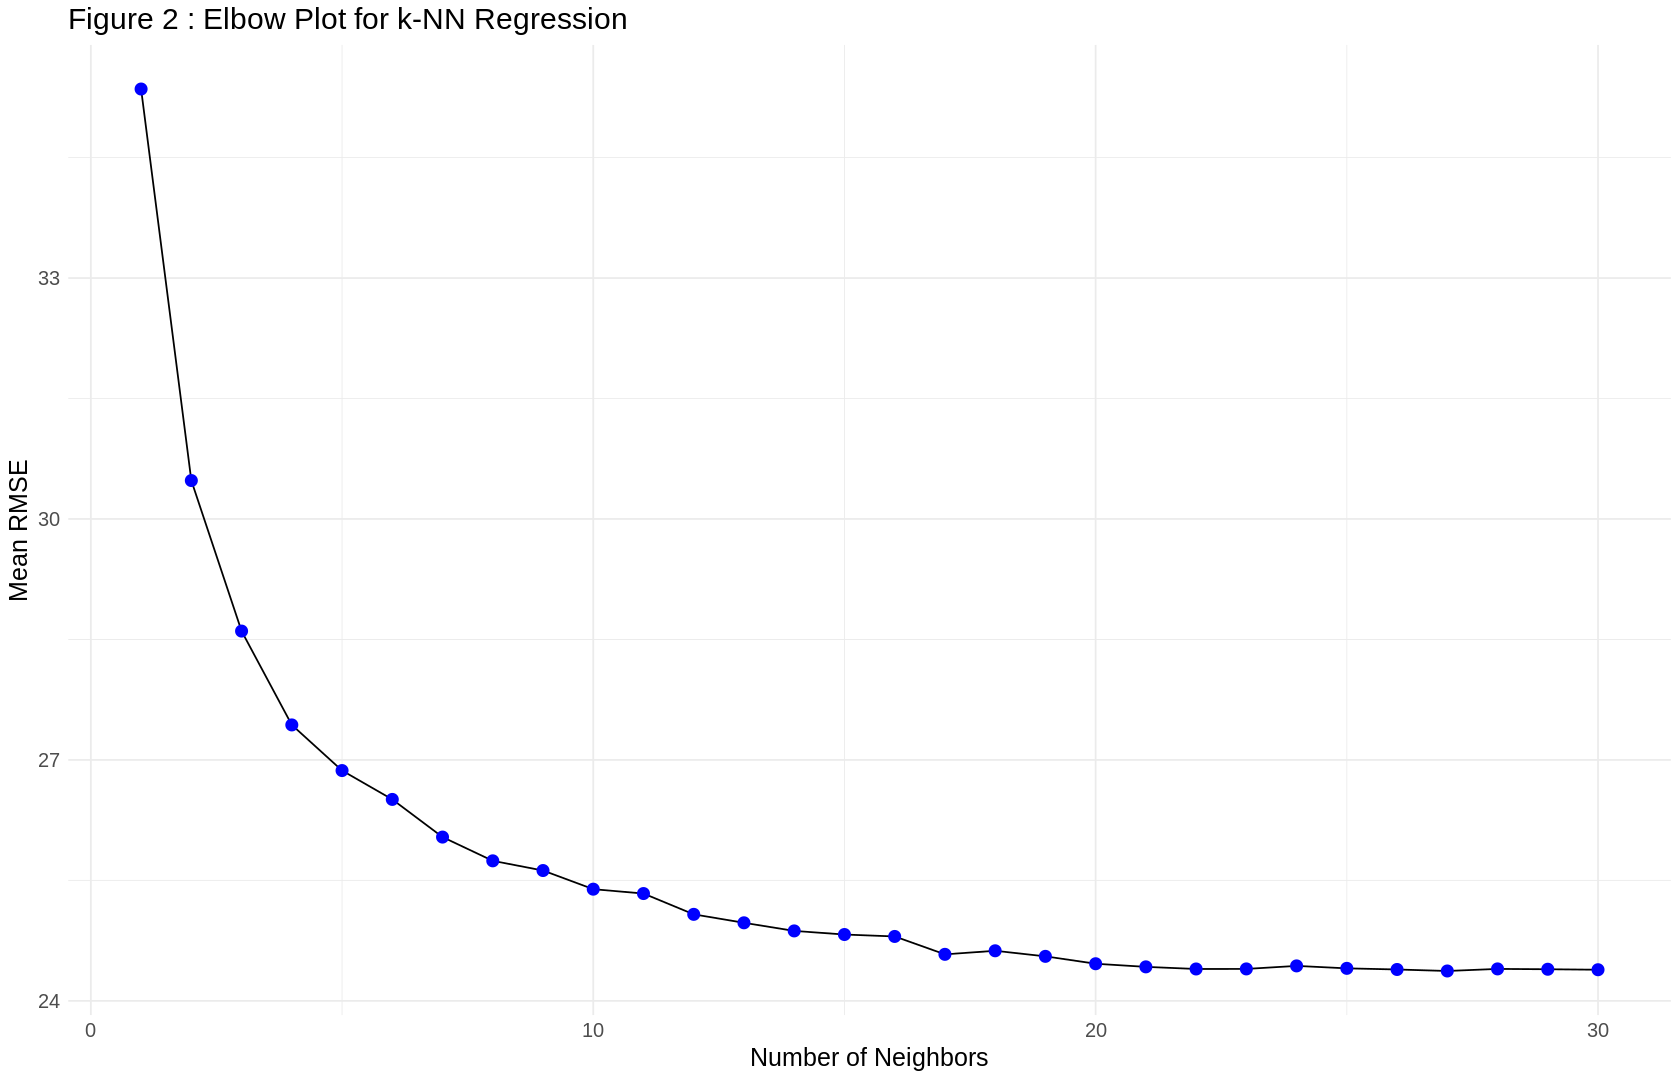

In [8]:
# Extract the relevant metrics from the hr_results
metrics <- hr_results |>
    filter(.metric == "rmse")  # Choose the metric you're interested in, e.g., RMSE

# Create an elbow plot
elbow_plot <- ggplot(metrics, aes(x = neighbors, y = mean)) +
    geom_line() +  # Line connecting the points
    geom_point(size = 3, color = "blue") +  # Points on the line
    theme_minimal() +  # Minimal theme for a clean look
    labs(
        x = "Number of Neighbors",
        y = "Mean RMSE"
    ) +
    theme(text = element_text(size = 15)) +
    ggtitle("Figure 2 : Elbow Plot for k-NN Regression")  # Add title to the plot

# Display the elbow plot
elbow_plot

Looking at the elbow plot, a k value of **6** seems adequate, as it represents the point where the decrease in the mean RMSE starts to level off, indicating a balance between model complexity and prediction accuracy. This point, often referred to as the 'elbow,' suggests that increasing the number of neighbors beyond 6 yields diminishing returns in terms of reducing prediction error.

In [9]:
# Define the best k-NN model specification with the optimal number of neighbors
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 6) |>
    set_engine("kknn") |>
    set_mode("regression")

# Create a workflow, add the recipe and the best model specification, and fit the model to the training data
hr_fit <- workflow() |>
    add_recipe(hr_recipe) |>
    add_model(knn_best_spec) |>
    fit(data = data_training)

# Predict on the testing data using the fitted model
hr_testing_pred <- hr_fit |>
    predict(data_testing) |>
    bind_cols(data_testing)

# Calculate performance metrics on the testing data
hr_summary <- hr_testing_pred |>
    metrics(truth = thalach, estimate = .pred)

# Display the summary of the metrics
hr_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,24.032847
rsq,standard,0.138693
mae,standard,19.966361


Now we shall visually assess the model performance using a scatter plot of actual vs. predicted thalach values with a line of equality.

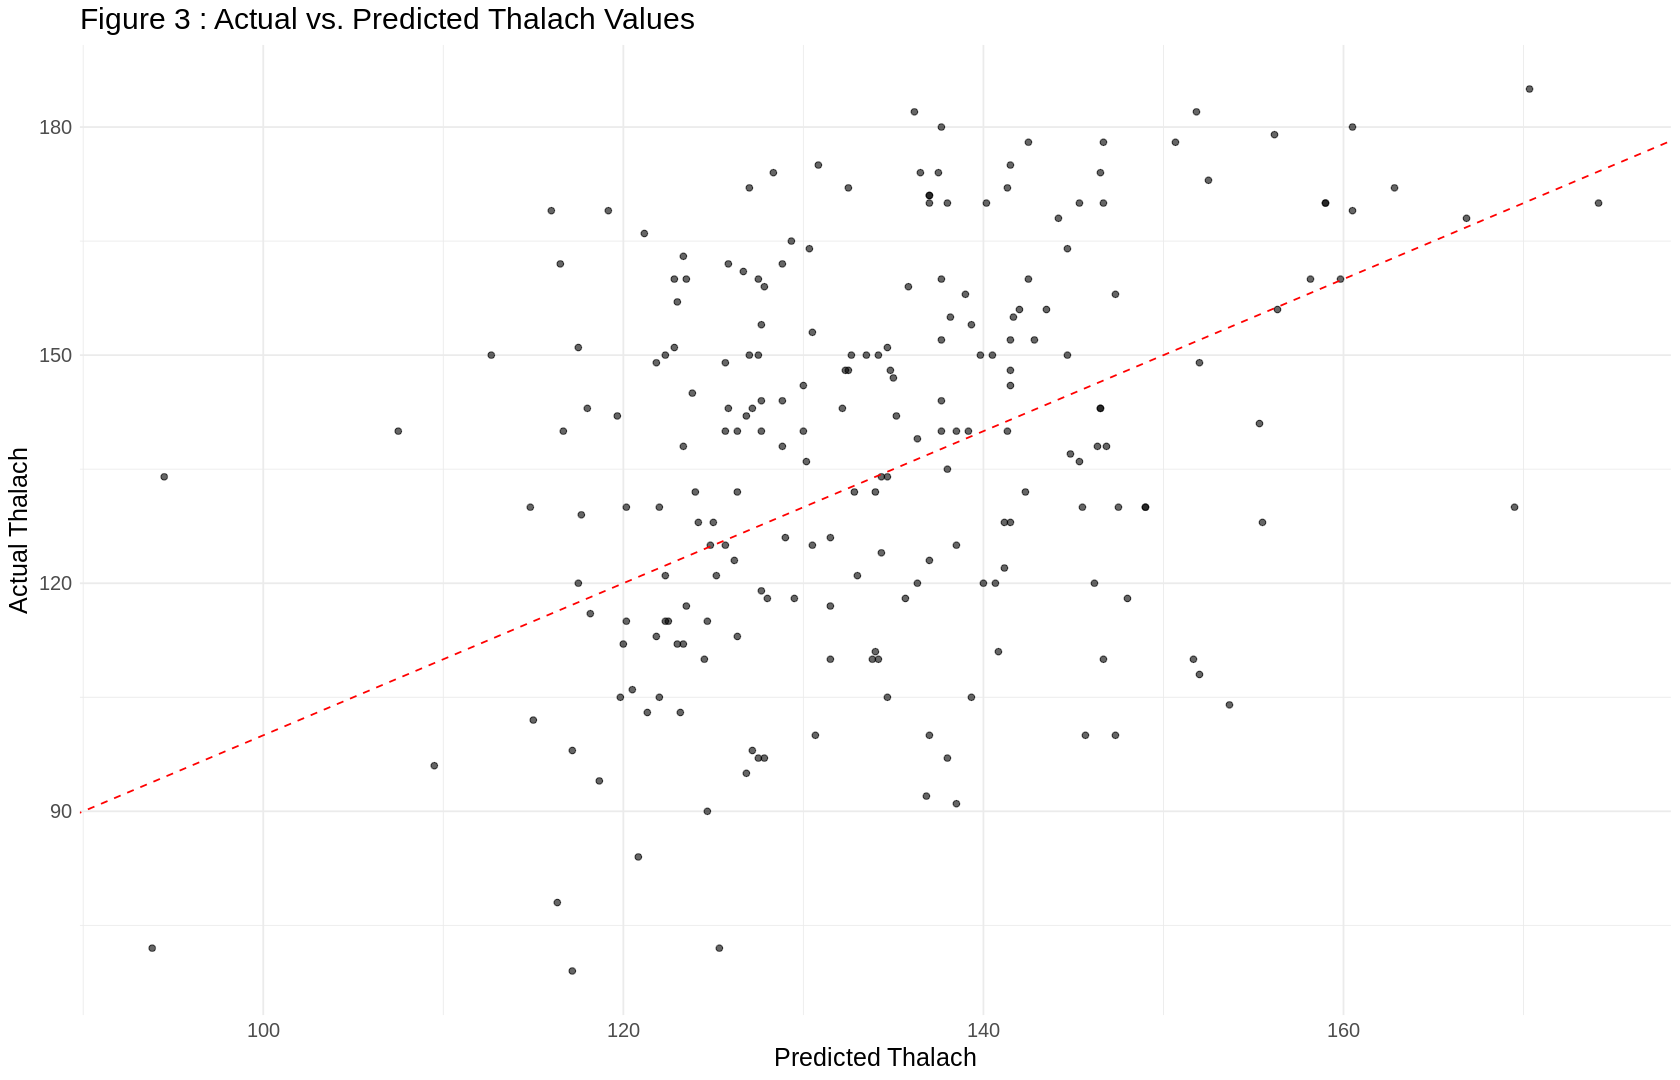

In [10]:
# Generate the scatter plot of actual vs. predicted thalach values
ggplot(hr_testing_pred, aes(x = .pred, y = thalach)) +
    geom_point(alpha = 0.6) +  # Scatter plot points
    geom_abline(slope = 1, intercept = 0, color = "red", linetype = "dashed") +  # Line of equality
    labs(
        x = "Predicted Thalach",
        y = "Actual Thalach"
    ) +
    theme_minimal() +
    theme(
        text = element_text(size = 15)
    ) +
    ggtitle("Figure 3 : Actual vs. Predicted Thalach Values")  # Add title to the plot

The scatter plot of actual vs. predicted thalach values, with a line of equality, provides a visual representation of the relationship between the predicted and actual maximum heart rate achieved by patients. Ideally, if the model predictions were perfect, all points would lie precisely on the red dashed line, which represents the line of equality where the predicted values equal the actual values. In this graph, while there is a visible trend indicating that the model's predictions are generally in the same range as the actual values, the points are widely scattered around the line of equality. This dispersion suggests that the relationship between the predicted and actual values is present but not very strong. The spread of points indicates a loose relationship, meaning that while the model can capture some patterns in the data, there is significant variability and prediction error, highlighting areas where the model's accuracy could be improved.

## Discussion

### Summary of Findings
In this analysis, we aimed to predict the maximum heart rate (thalach) achieved by patients during exercise based on their age, resting blood pressure (trestbps), and ST depression induced by exercise (oldpeak). Using a k-nearest neighbors (k-NN) regression model, we found that while the model could capture some patterns in the data, the overall relationship between the predicted and actual thalach values was relatively weak. This was visually confirmed through a scatter plot of actual vs. predicted thalach values, where the points were dispersed around the line of equality, indicating significant prediction errors.

### Expectations vs. Findings
The findings were somewhat in line with expectations, given the complexity of predicting physiological responses such as heart rate, which can be influenced by numerous factors beyond age, resting blood pressure, and ST depression. While we anticipated that these variables would provide some predictive power, the weak relationship observed suggests that additional factors might need to be considered to improve prediction accuracy.

### Impact of Findings
The weak predictive relationship found in this study underscores the need for more comprehensive models that incorporate a wider range of clinical and possibly genetic factors to accurately predict heart rate responses to exercise. These findings highlight the limitations of using a small set of predictors for complex physiological outcomes, suggesting that clinicians and researchers should consider a more holistic approach in their analyses (Lamba et al., 2021).

### Future Questions
The results of this study open several avenues for future research:
1. **What additional variables could improve the prediction of maximum heart rate during exercise?** Future studies could explore incorporating more comprehensive datasets, including lifestyle factors, genetic information, and more detailed medical history (Chayakrit Krittanawong et al., 2020).
2. **How do non-clinical factors, such as psychological stress or environmental conditions, impact the maximum heart rate achieved during exercise?**
3. **Can machine learning models more complex than k-NN, such as ensemble methods or neural networks, provide better predictive accuracy for this task?**
4. **How do different populations (e.g., based on ethnicity, age group, or gender) vary in their heart rate responses to exercise, and what implications does this have for personalized medicine?**

## References
1. Lamba, D., Hsu, W. H., & Majed Alsadhan. (2021). Predictive analytics and machine learning for medical informatics: A survey of tasks and techniques. Elsevier EBooks, 1–35. https://doi.org/10.1016/b978-0-12-821777-1.00023-9
2. Chayakrit Krittanawong, Virk, H., Sripal Bangalore, Wang, Z., Johnson, K. W., Pinotti, R., Zhang, H., Kaplin, S., Narasimhan, B., Takeshi Kitai, Baber, U., Halperin, J. L., & Tang, W. (2020). Machine learning prediction in cardiovascular diseases: a meta-analysis. Scientific Reports, 10(1). https://doi.org/10.1038/s41598-020-72685-1
3. Source of data: UCI Machine Learning Repository. (2019). Uci.edu. https://archive.ics.uci.edu/dataset/45/heart+disease